In [2]:
import tensorflow as tf
x = tf.convert_to_tensor(2.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x - 2
    z = y * x

grads = tape.gradient(z, x)

2023-05-31 11:14:42.922616: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-31 11:14:45.696830: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-31 11:14:45.696875: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-31 11:14:45.696992: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ctpc09): /proc/driver/nvidia/version does not exist
2023-05-31 11:14:45.698660: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with th

In [3]:
grads

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [4]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
print('TensorFlow version', tf.__version__)

TensorFlow version 2.5.0


In [5]:
model = tf.keras.applications.vgg16.VGG16(
    include_top = False, weights = 'imagenet',
    input_shape=(96,96,3)
)
model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

In [6]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )
get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


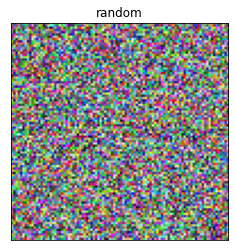

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

def create_image():
    return tf.random.uniform((96, 96, 3), minval=0.0, maxval=1.0)

def plot_image(image, title='random'):
    image = tf.clip_by_value(image, 0.0, 1.0)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.show()

image = create_image()
plot_image(image)


In [21]:
def visualize_filter (layer_name, f_index=None, iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters - 1) 
  assert num_filters > f_index, 'f_index is out of bounds'

  image = create_image() 
  verbose_step= int(iters / 10)


  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis=0)) [:,:,:,f_index] 
      loss=tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads * 10
    
    if (i + 1)% verbose_step== 0:
      print(f'Iteration: {i + 1}, Loss: {loss.numpy():.4f}')
  plot_image(image, f'{layer_name}, {f_index}')

In [22]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10, Loss: 2.8074
Iteration: 20, Loss: 4.9740
Iteration: 30, Loss: 7.1407
Iteration: 40, Loss: 9.3074
Iteration: 50, Loss: 11.4740
Iteration: 60, Loss: 13.6407
Iteration: 70, Loss: 15.8074
Iteration: 80, Loss: 17.9740
Iteration: 90, Loss: 20.1407
Iteration: 100, Loss: 22.3074


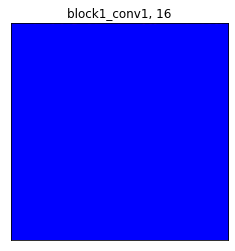

In [24]:
layer_name = 'block1_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, iters=100)